 # Suicide Analysis in India 
### In this notebook we will try to understand what might be the different reasons due to which people committed suicide in India (using the dataset "Suicides in India"). Almost 11,89,068 people committed suicide in 2012 alone, it is quite important to understand why they commit suicide and try to mitigate

## IMPORT ALL THE NECESSARY LIBRARY

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
from sklearn.preprocessing import LabelEncoder

In [49]:
iter = 15

palette = list(reversed(sns.color_palette("Spectral_r", iter).as_hex()))
print(palette)

width_px=1000
new = Image.new(mode="RGB", size=(width_px,120))

for i in range(iter):

    newt = Image.new(mode="RGB", size=(width_px//iter,100), color=palette[i])
    new.paste(newt, (i*width_px//iter,10))

['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', '#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']


## GATHER THE SUICIDES IN INDIA DATASET TAKEN BY KAGGLE

In [50]:
suicide = pd.read_csv('Suicides.csv')

In [51]:
suicide.head()

,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


## FIND THE MISSING VALUE, IF ITS PRESENT

In [52]:
suicide.isnull().sum()

index        0
State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

### LUCKY FOR US WE DON'T HAVE ANY MISSING VALUE.se

## FIND THE DUPLICATE VALUE, IF ITS PRESENT

In [53]:
suicide.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
237514    False
237515    False
237516    False
237517    False
237518    False
Length: 237519, dtype: bool

### LUCKY FOR US WE DON'T HAVE ANY DUPLICATE VALUE.

## UNDERSTAND THE SUICIDES IN INDIA DATASET

In [54]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      237519 non-null  int64 
 1   State      237519 non-null  object
 2   Year       237519 non-null  int64 
 3   Type_code  237519 non-null  object
 4   Type       237519 non-null  object
 5   Gender     237519 non-null  object
 6   Age_group  237519 non-null  object
 7   Total      237519 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 14.5+ MB


# How many people committed suicide from 2001-2012 in india ?

Total cases from 2001-12: 
 Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


<Axes: xlabel='Year'>

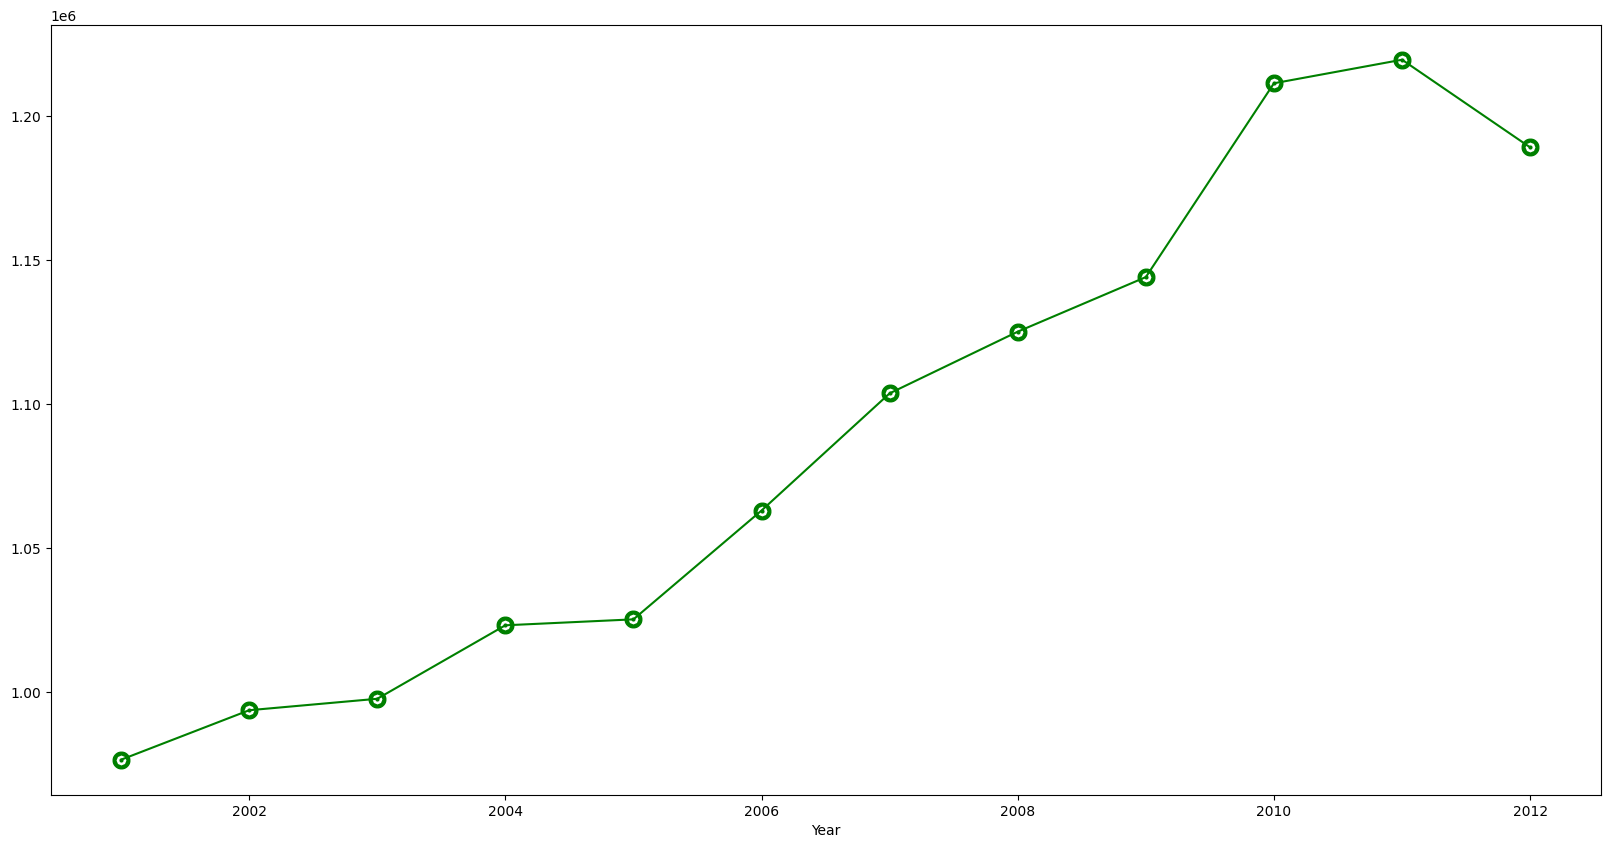

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
print("Total cases from 2001-12: \n",suicide.groupby("Year")["Total"].sum())
suicide.groupby("Year")["Total"].sum().plot(kind="line",color='g',marker='.',markeredgewidth='10')

# What all states are present in the dataset?
## This step is done in order to merge states with same name but different spelling or redundent state names.

In [56]:
suicide["State"].value_counts()

State
MAHARASHTRA          6792
MADHYA PRADESH       6792
KARNATAKA            6792
ODISHA               6791
ANDHRA PRADESH       6791
RAJASTHAN            6791
BIHAR                6790
CHHATTISGARH         6790
HARYANA              6790
KERALA               6788
UTTAR PRADESH        6787
TAMIL NADU           6786
GUJARAT              6786
ASSAM                6786
JHARKHAND            6785
DELHI (UT)           6782
TRIPURA              6782
WEST BENGAL          6780
PUNJAB               6779
HIMACHAL PRADESH     6774
JAMMU & KASHMIR      6761
GOA                  6759
UTTARAKHAND          6758
SIKKIM               6742
MIZORAM              6737
MEGHALAYA            6733
PUDUCHERRY           6730
CHANDIGARH           6717
A & N ISLANDS        6712
DAMAN & DIU          6710
ARUNACHAL PRADESH    6707
NAGALAND             6705
D & N HAVELI         6704
MANIPUR              6700
LAKSHADWEEP          6674
TOTAL (UTs)           312
TOTAL (ALL INDIA)     312
TOTAL (STATES)        312
Name: 

# Which gender tends to commit more suicide?.

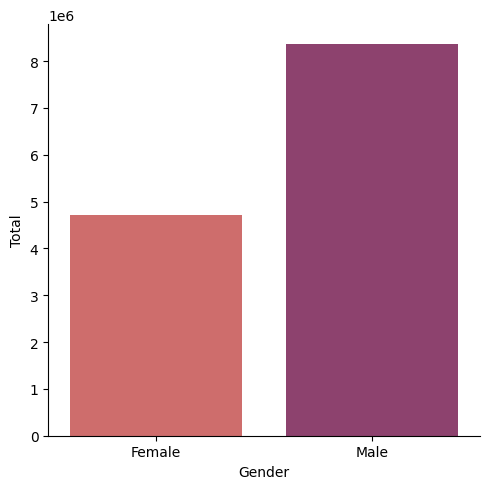

In [57]:
suicide_gender = pd.DataFrame(suicide.groupby("Gender")["Total"].sum()).reset_index()
sns.catplot(x="Gender", y="Total",  palette='flare', kind="bar", data=suicide_gender,hue="Gender")

plt.figure(figsize=(6,6))
plt.pie(ar,labels=ar,autopct='%1.2f%%')
plt.title('gender suicide pie chart')
plt.show

## It looks like Males tend to commit more suicides compared to Females in India.

## DATA VISUALIZE WITH USING THE PIECHART

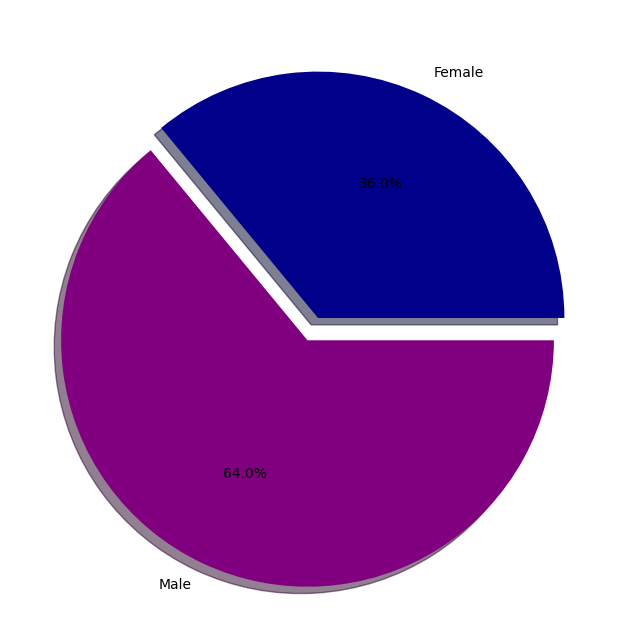

In [58]:
# Draw the same bargraph as a pie chart to see the percentage stats

colors = ['darkblue','purple']
fig, ax = plt.subplots(figsize=(8,8))
df_gender = suicide.groupby('Gender')['Total'].sum()
df_gender_type = pd.DataFrame(df_gender).reset_index().sort_values('Total')
labels = df_gender_type['Gender']
exp = (0,0.1)
plt.pie(df_gender_type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True, colors=colors)
plt.show()

# In which states do people tend to commit more suicide?¶

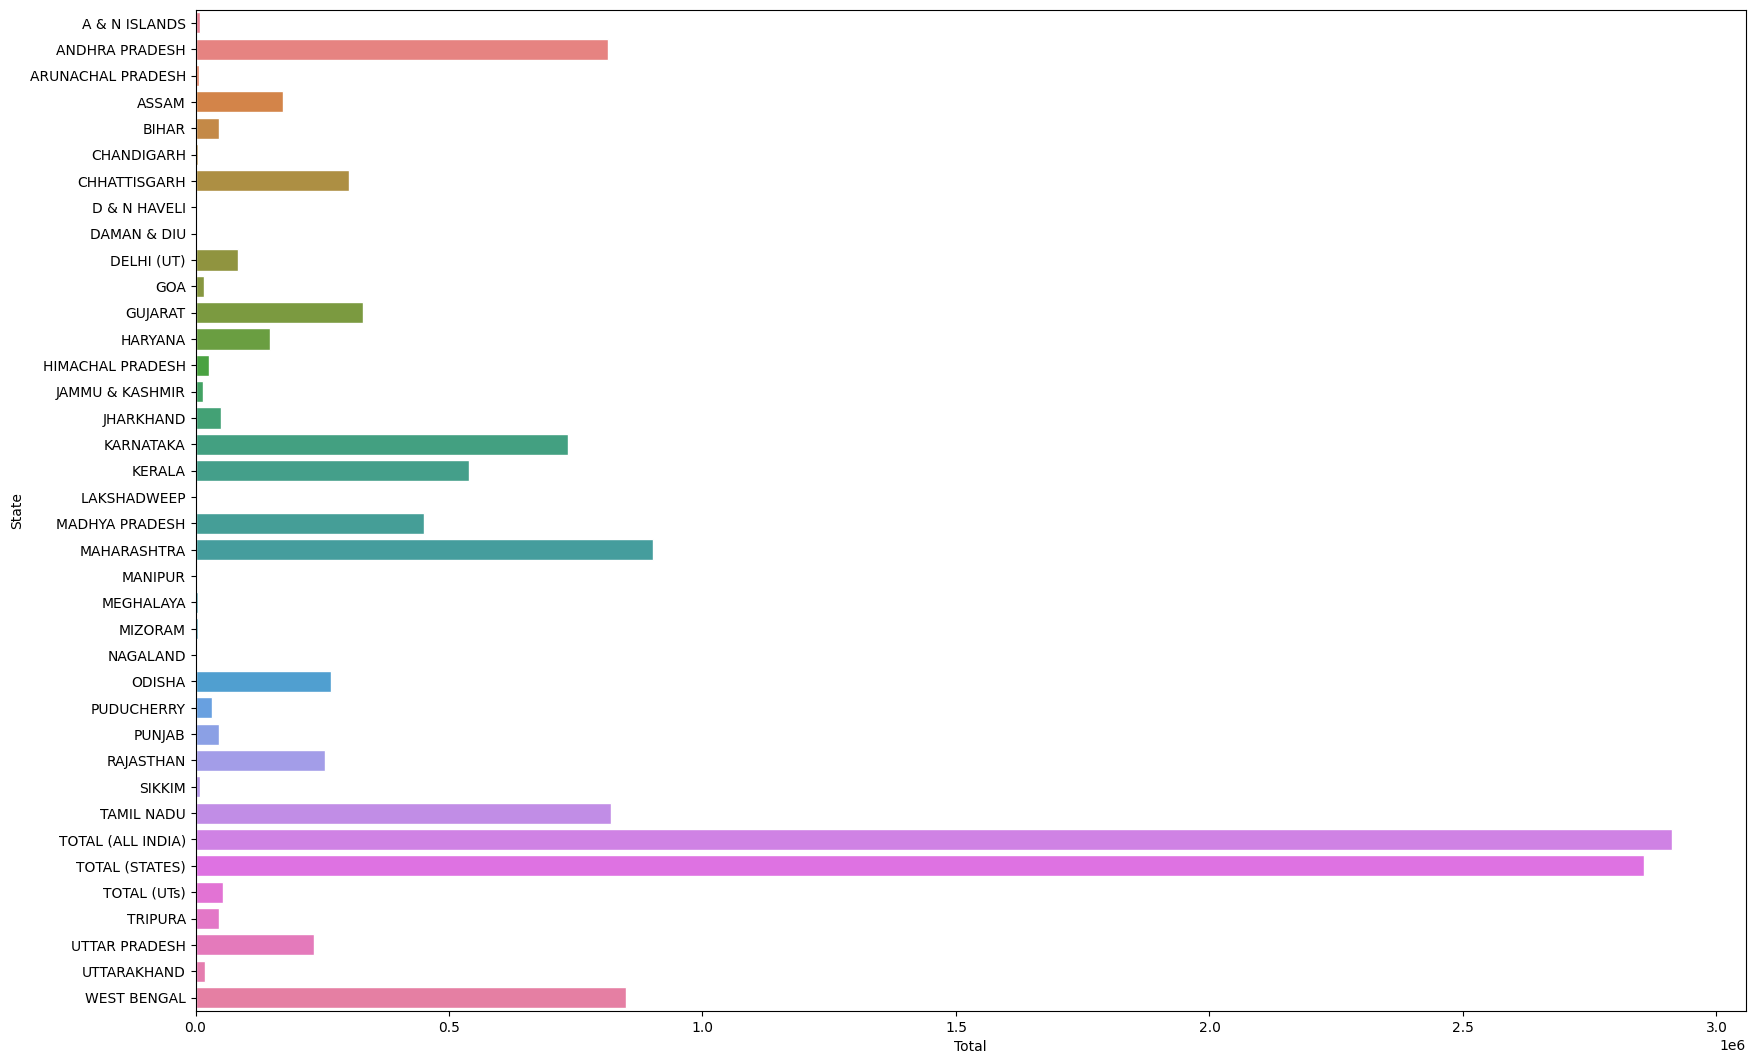

In [59]:
fig, ax = plt.subplots(figsize=(20,13))
suicide_state = pd.DataFrame(suicide.groupby(["State"])["Total"].sum()).reset_index()
sns.barplot(y = 'State', x = 'Total',data = suicide_state, edgecolor = 'w',hue="State")
plt.show()


## From the given visualization it is clear that the top 4 states with maximum suicide cases are

#### 1. Maharashtra
#### 2. West Bengal
#### 3. Tamil Nadu
#### 4. Andhra Pradesh

# How has the number of cases changed over time ?
 
From the previous bar chat, we know that male commit more suicide compared to female, but we didn't know what is the rate of growth of no. of cases. 

This plot shows a steeper +ve slope for males compared to females -> which means more number of males might commit suicide in the future.

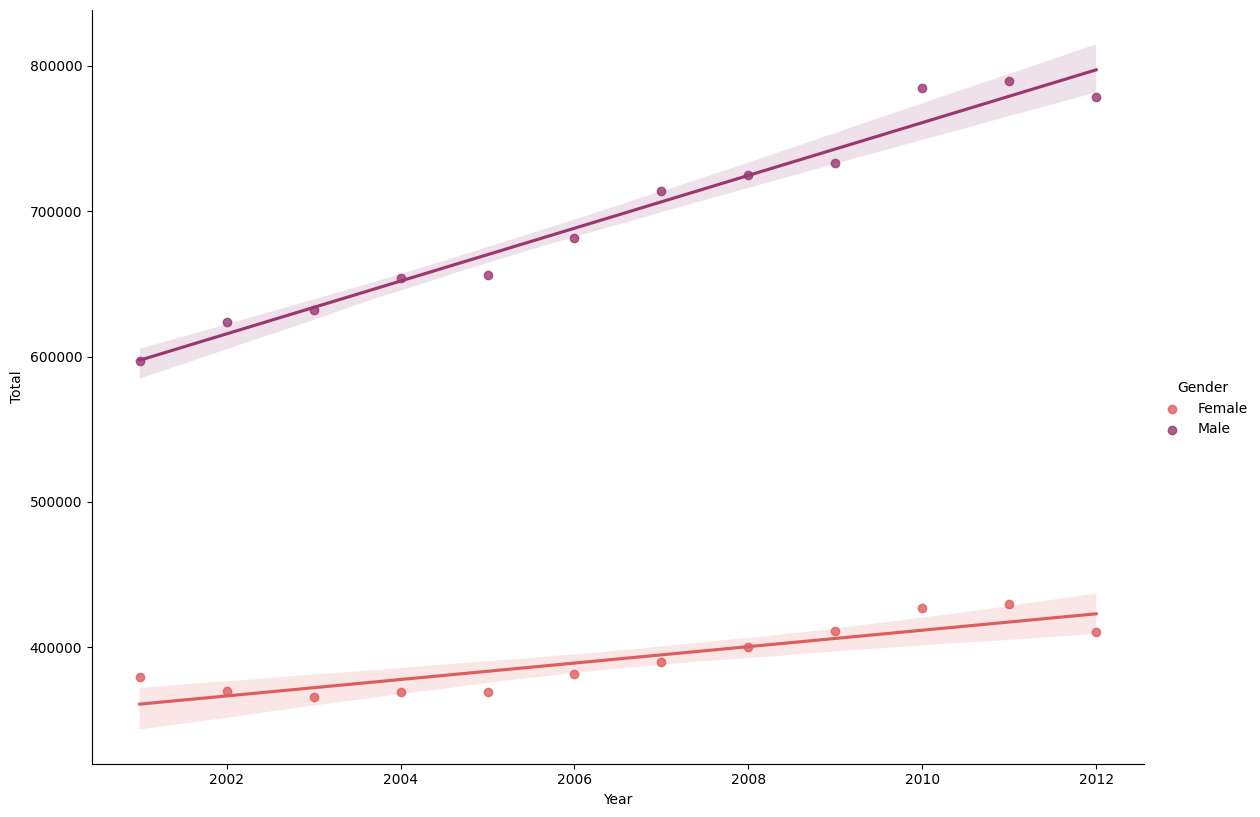

In [60]:
grouped_year = suicide.groupby(["Year","Gender"])["Total"].sum()
grouped_year = pd.DataFrame(grouped_year).reset_index()
# grouped_year
sns.lmplot(x="Year", y="Total",hue="Gender",  palette='flare', data=grouped_year,height=8.27, aspect=11.7/8.27);

# Number of cases bases on the reason they committed suicide("Type_code")¶
Note: "Causes" means other causes according to me(it was not clearly mentioned in the dataset)



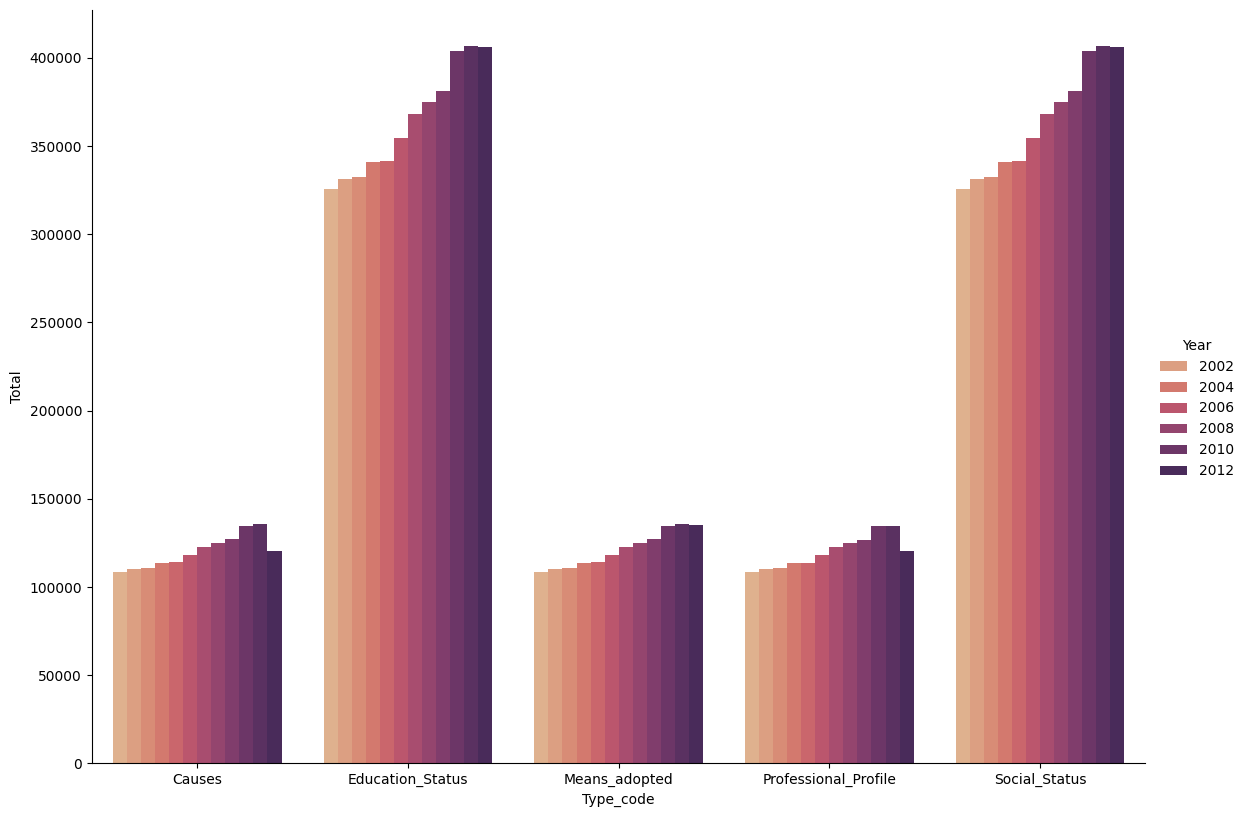

In [61]:
filter_type_code = pd.DataFrame(suicide.groupby(["Type_code","Year"])["Total"].sum()).reset_index()
filter_type_code
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", palette='flare',data=filter_type_code,height=8.27, aspect=11.7/8.27);

# Which social issues causes more suicides?
It appears that married people count for the majority of suicide cases.

Which makes sense because marriage issues may cause conflict between the couple and as a result they might be prone to commit suicide.

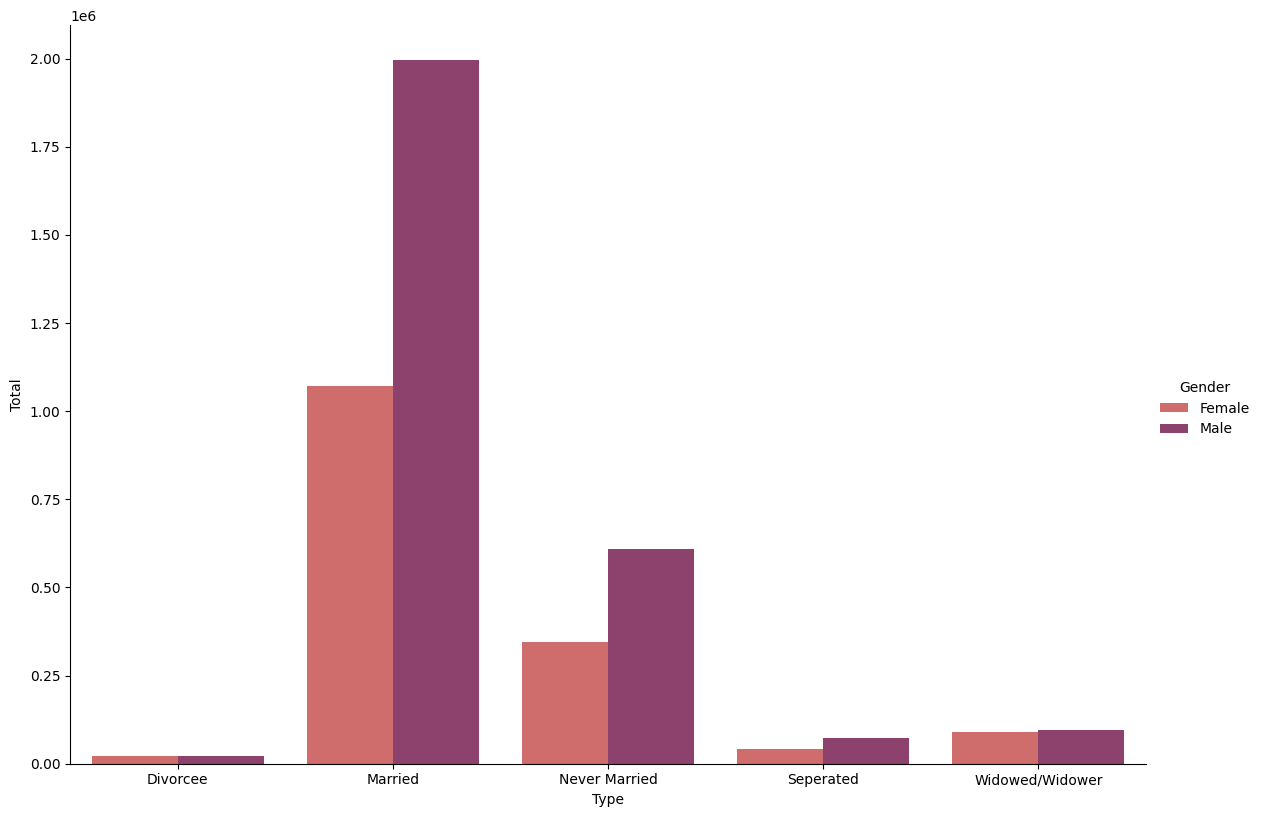

In [62]:
filter_social_status = pd.DataFrame(suicide[suicide["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
sns.catplot(x="Type", y="Total",hue="Gender",  palette='flare', kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);

# What was the education status of people who committed suicides?
It appears that people with low education tend to commit more suicide.

People with Diploma and Graduate tend to commit least no. of suicide

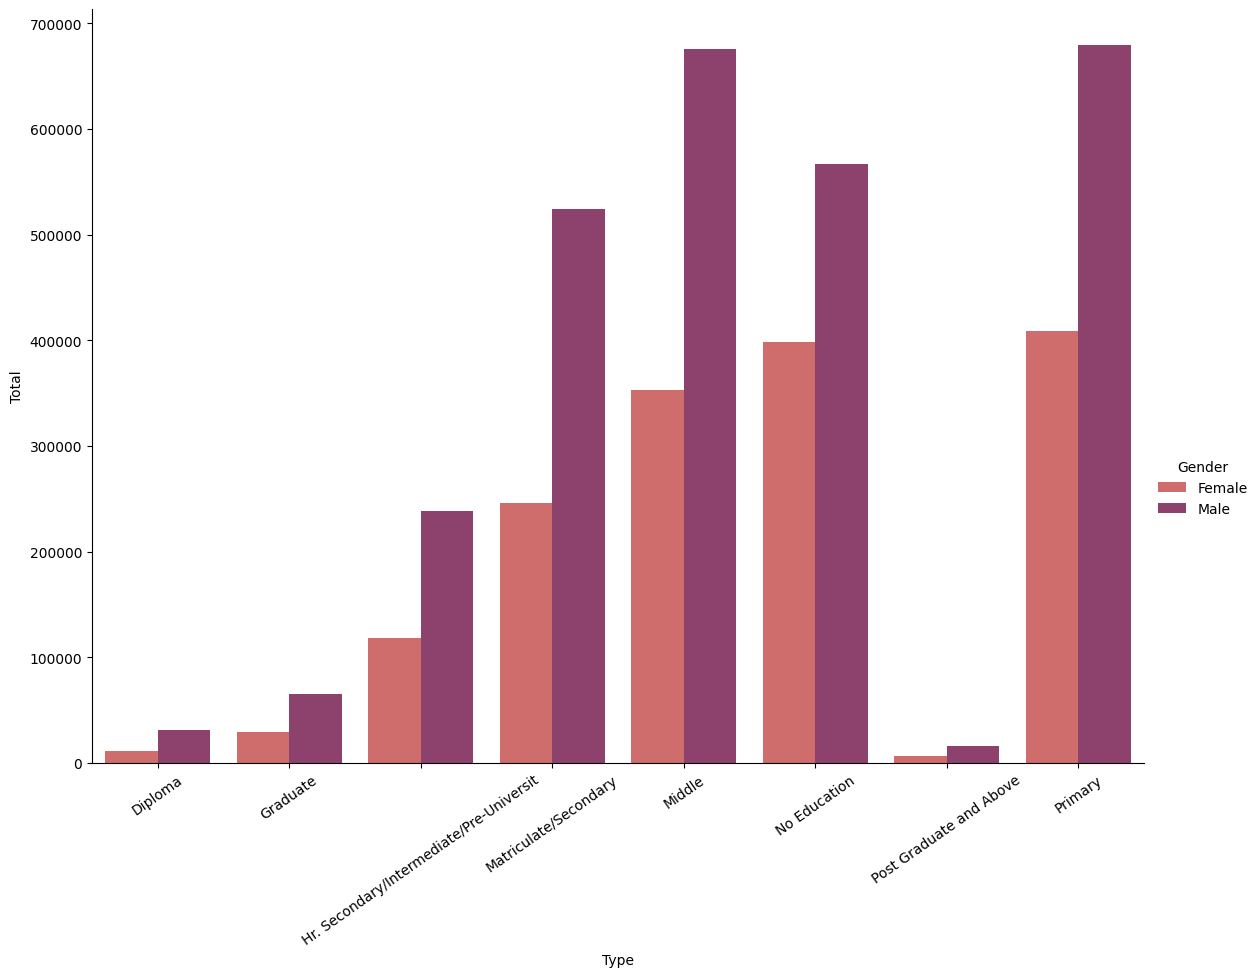

In [63]:
filter_social_status = pd.DataFrame(suicide[suicide["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", palette='flare', data=filter_social_status,height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=35)

# What was the profession of the people who committed suicides?
Farmers and housewives tend to commit more suicide compared to others.

This makes sense because most of the Indian farmers have debt and their life depends on the yield of their crops, if the yield is not good then they will not be able to clear their debt and in the worst case they might commit suicide.

Global warming, monsoon delay, drought etc can lead to bad yield.

Housewives might have issues in their marriage which this might be a reason for such a high number of cases.

Domestic violence, dowry, gender discrimination, etc might be some of the reasons for housewives to commit suicide.

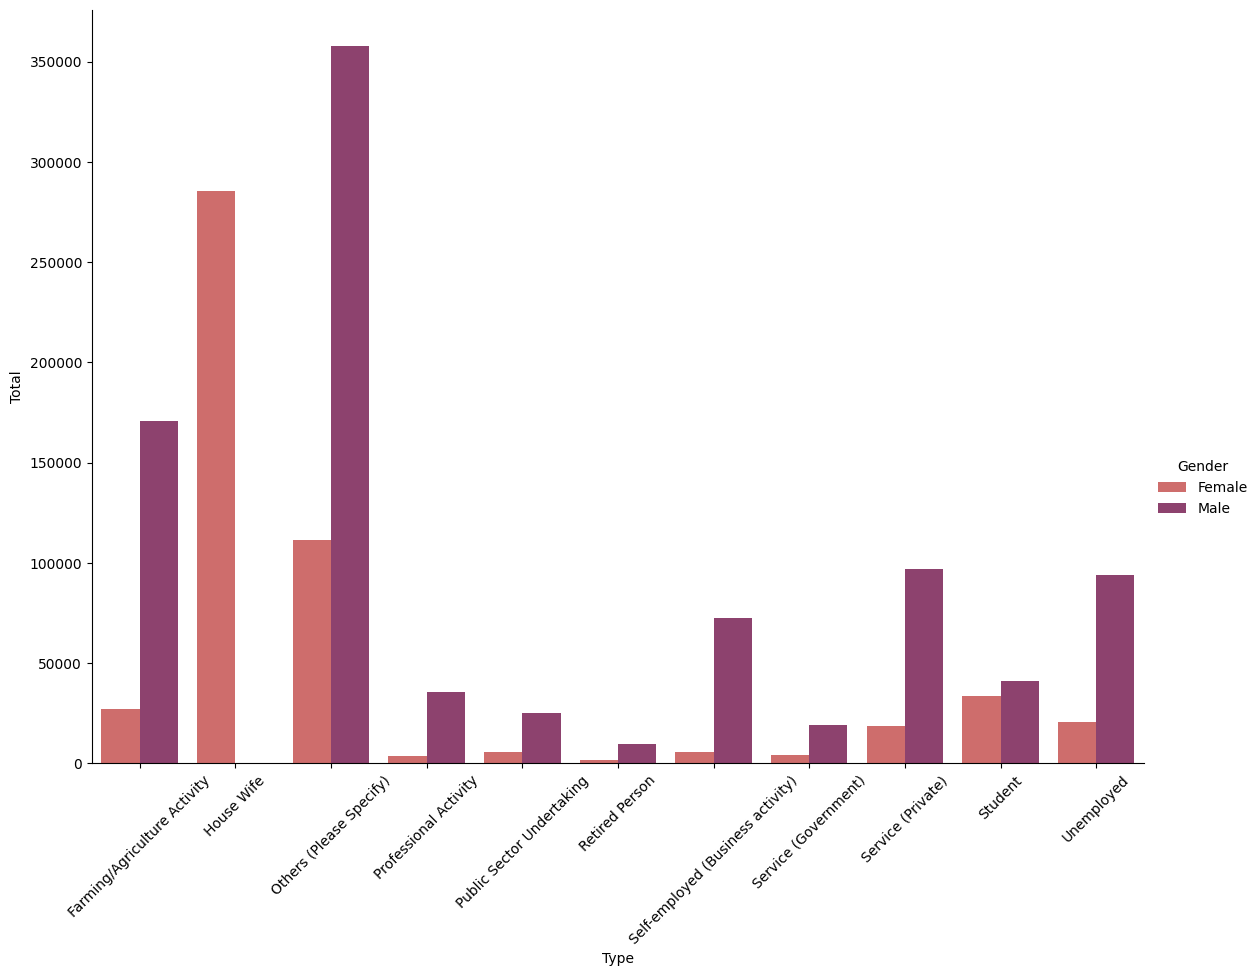

In [64]:
filter_social_status = pd.DataFrame(suicide[suicide["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", palette='flare', kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=45)

# Which age group people tend to commit more suicide?
From the below visualization it is clear that youngsters (15-29 age) and middle age (30-44) tend to commit the maximum number of suicides.

It can be due to several reasons like:

unemployment
academic stress
bad friend circle
farmers (since they have to be young and strong enough to do farming)
addictions

# age group 0-100+ encapsulates all the remaining age groups, hence it would make sense to drop it
filter_age = suicide[suicide["Age_group"]!="0-100+"]
sns.catplot(x="Age_group", y="Total",hue="Age_group", kind="bar", data=filter_age, aspect=11.7/8.27);

In [65]:
# Here we are spliting the data into different age groups

gp_age = suicide.groupby('Age_group')['Total'].sum()
df_age_type = pd.DataFrame(gp_age).reset_index().sort_values('Age_group')
df_age_type = df_age_type.drop([0])
df_age_type

,Age_group,Total
1,0-14,98410
2,15-29,1534037
3,30-44,1471599
4,45-59,885177
5,60+,346925


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_17220\1435372571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_age_type['Age_group'], y = df_age_type['Total'], palette='flare')


<Axes: xlabel='Age_group', ylabel='Total'>

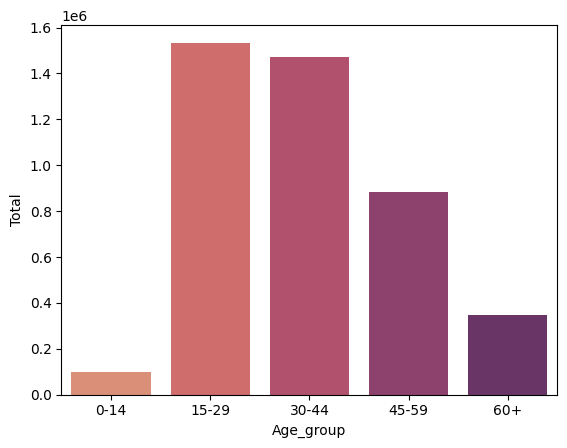

In [66]:
# Draw a bargraph categorising the people into different age groups

sns.barplot(x = df_age_type['Age_group'], y = df_age_type['Total'], palette='flare')

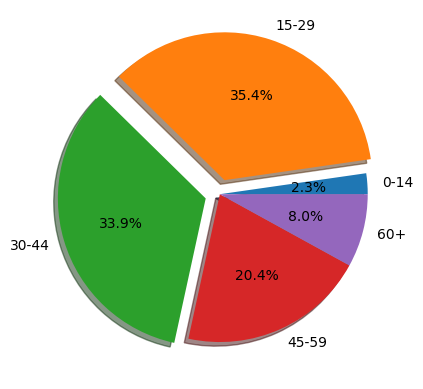

In [67]:
# Draw the same bargraph as a pie chart to see the percentage stats

labels = df_age_type['Age_group']
exp = (0,0.1,0.1,0,0)
plt.pie(df_age_type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.show()

# Conclusion
Males tend to commit more suicides compared to Females in India

Highest no. of suicide cases occur in Maharashtra, West Bengal ,Andhra Pradesh and Tamil Nadu.

Male might commit more suicide compared to females in the future if this trend continues.

People who commit suicide are mostly:

Married

Farmers and housewives

Youngsters (15-29 age) and middle age (30-44)

### In different state how people to commited the suicides

In [68]:
suicide.groupby('State').Total.sum().sort_values(ascending=False)

State
TOTAL (ALL INDIA)    2911862
TOTAL (STATES)       2858026
MAHARASHTRA           901945
WEST BENGAL           849936
TAMIL NADU            818691
ANDHRA PRADESH        814059
KARNATAKA             734825
KERALA                538946
MADHYA PRADESH        451535
GUJARAT               330858
CHHATTISGARH          302354
ODISHA                267234
RAJASTHAN             255134
UTTAR PRADESH         233352
ASSAM                 172276
HARYANA               147176
DELHI (UT)             84272
TOTAL (UTs)            53836
JHARKHAND              49720
PUNJAB                 46350
BIHAR                  46214
TRIPURA                45965
PUDUCHERRY             32144
HIMACHAL PRADESH       26562
UTTARAKHAND            18496
GOA                    17363
JAMMU & KASHMIR        14821
SIKKIM                  9606
A & N ISLANDS           8109
ARUNACHAL PRADESH       6633
MEGHALAYA               5415
CHANDIGARH              5164
MIZORAM                 4154
D & N HAVELI            3430
MANIPUR 

## Social Status

C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_17220\3336545213.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x = 'State', y = 'Total', data = tot_suicides, palette = 'flare')
C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_17220\3336545213.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 50)


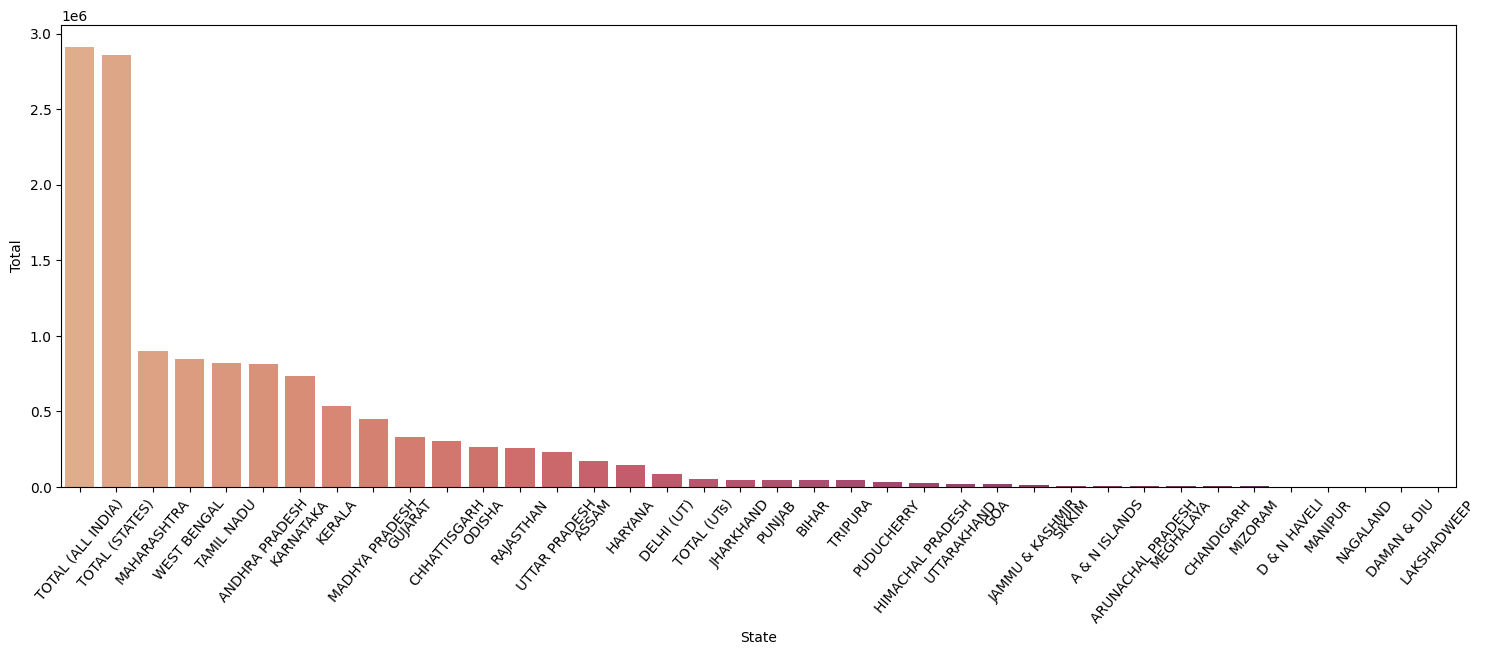

In [69]:
# Here we are grouping the data statewise so as to see which state has the most cases.

group = suicide.groupby('State')['Total'].sum()
tot_suicides = pd.DataFrame(group).reset_index().sort_values('Total',ascending=False)

# Draw a bargraph categorising the data into statewise form, which is obtained from above

fig, ax = plt.subplots(figsize=(18,6))
plot = sns.barplot(x = 'State', y = 'Total', data = tot_suicides, palette = 'flare')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 50)
plt.show()

# Now lets analyse further by considering the state of Maharashtra which has the most number of suicides recorded.

In [70]:
# Segregating the data of Maharashtra.

Maharashtra = suicide['State']=='MAHARASHTRA'
m = suicide[Maharashtra]
m

,index,State,Year,Type_code,Type,Gender,Age_group,Total
118717,118717,MAHARASHTRA,2001,Causes,Death of Dear Person,Female,15-29,19
118718,118718,MAHARASHTRA,2001,Causes,Death of Dear Person,Male,30-44,18
118719,118719,MAHARASHTRA,2001,Causes,Divorce,Male,30-44,8
118720,118720,MAHARASHTRA,2001,Causes,Dowry Dispute,Female,45-59,1
118721,118721,MAHARASHTRA,2001,Causes,Fall in Social Reputation,Male,15-29,21
...,...,...,...,...,...,...,...,...
234546,234546,MAHARASHTRA,2012,Means_adopted,By Drowning,Female,60+,60
234547,234547,MAHARASHTRA,2012,Means_adopted,By Fire/Self Immolation,Female,30-44,289
234548,234548,MAHARASHTRA,2012,Means_adopted,By Fire-Arms,Male,0-14,0
234549,234549,MAHARASHTRA,2012,Professional_Profile,Professional Activity,Male,0-14,0


#  How many people committed suicide from 2001-2012 MAHARASHTRA ?

In [71]:
d = m.groupby('Year').Total.sum()
d

Year
2001    73090
2002    72645
2003    73800
2004    73645
2005    72130
2006    77470
2007    75920
2008    71870
2009    71500
2010    79580
2011    79735
2012    80560
Name: Total, dtype: int64

Total cases from 2001-12: 
 Year
2001    73090
2002    72645
2003    73800
2004    73645
2005    72130
2006    77470
2007    75920
2008    71870
2009    71500
2010    79580
2011    79735
2012    80560
Name: Total, dtype: int64


<Axes: xlabel='Year'>

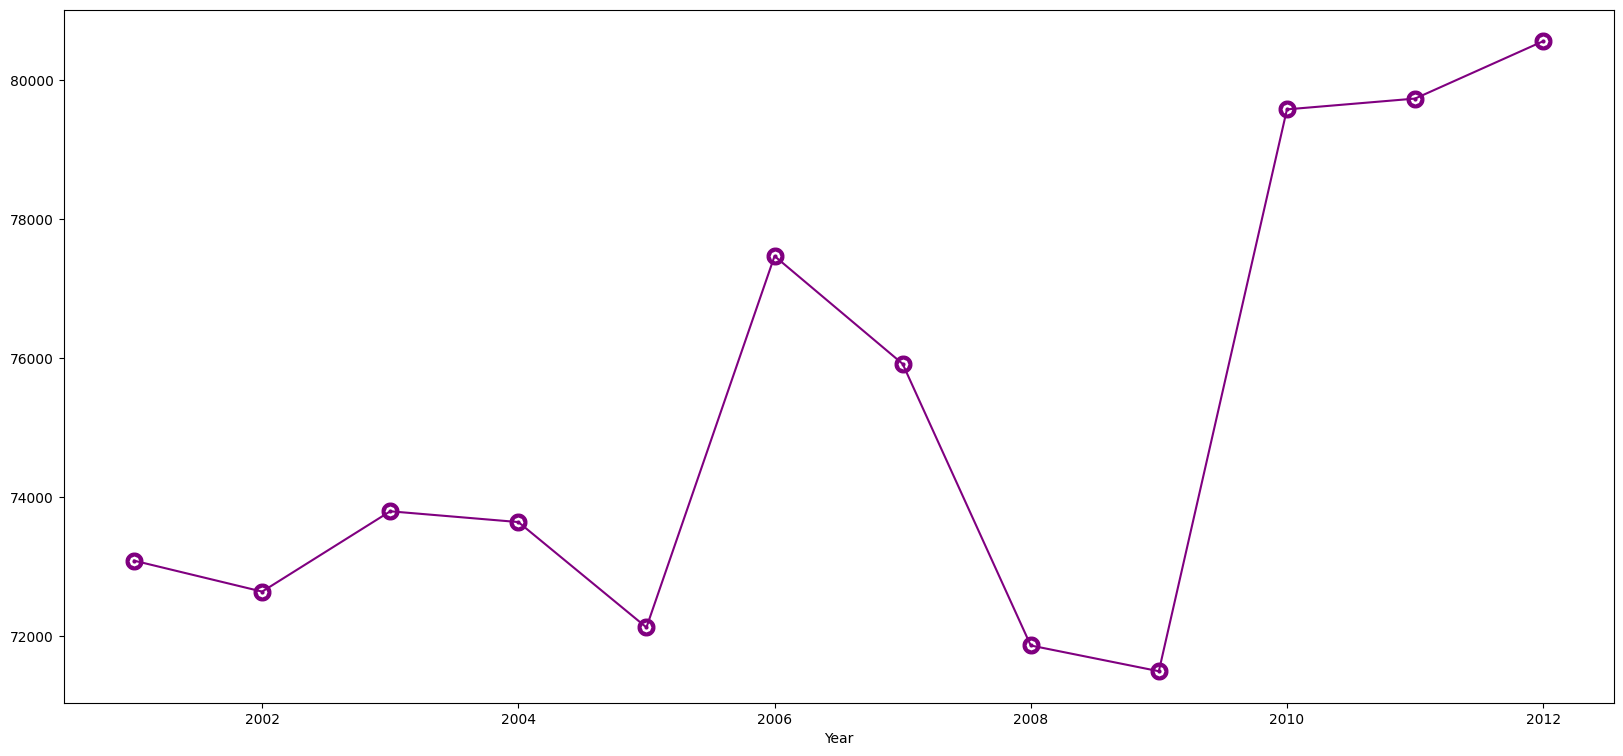

In [72]:
fig, ax = plt.subplots(figsize=(20,9))
print("Total cases from 2001-12: \n",d)
d.plot(kind="line",color='purple',marker='.',markeredgewidth='10')

# Which gender tends to commit more suicide?

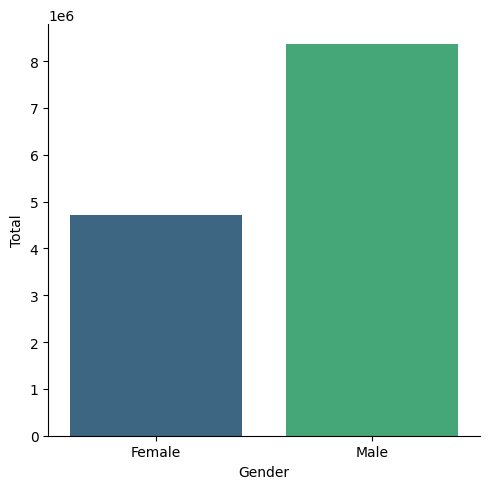

In [73]:
m_gender = pd.DataFrame(m.groupby("Gender")["Total"].sum()).reset_index()
sns.catplot(x="Gender", y="Total",  palette='viridis', kind="bar", data=suicide_gender,hue="Gender")

## It looks like Males tend to commit more suicides compared to Females in Maharashtra.

## DATA VISUALIZE WITH USING THE PIECHART

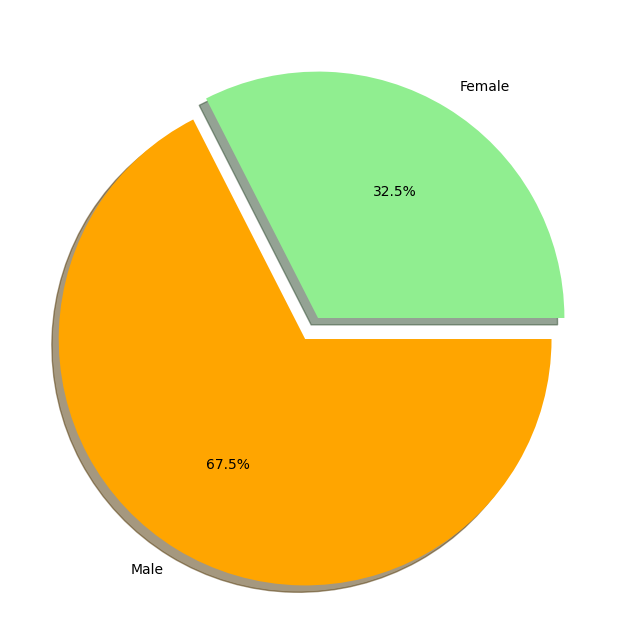

In [74]:
colors = ['lightgreen','orange']
fig, ax = plt.subplots(figsize=(8,8))
g_gender = m.groupby('Gender')['Total'].sum()
g_gender_type = pd.DataFrame(g_gender).reset_index().sort_values('Total')
labels = g_gender_type['Gender']
exp = (0,0.1)
plt.pie(g_gender_type['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True,  colors=colors)
plt.show()

# How has the number of cases changed over time ?
 
From the previous bar chat, we know that male commit more suicide compared to female, but we didn't know what is the rate of growth of no. of cases. 

This plot shows a steeper +ve slope for males compared to females -> which means more number of males might commit suicide in the future.

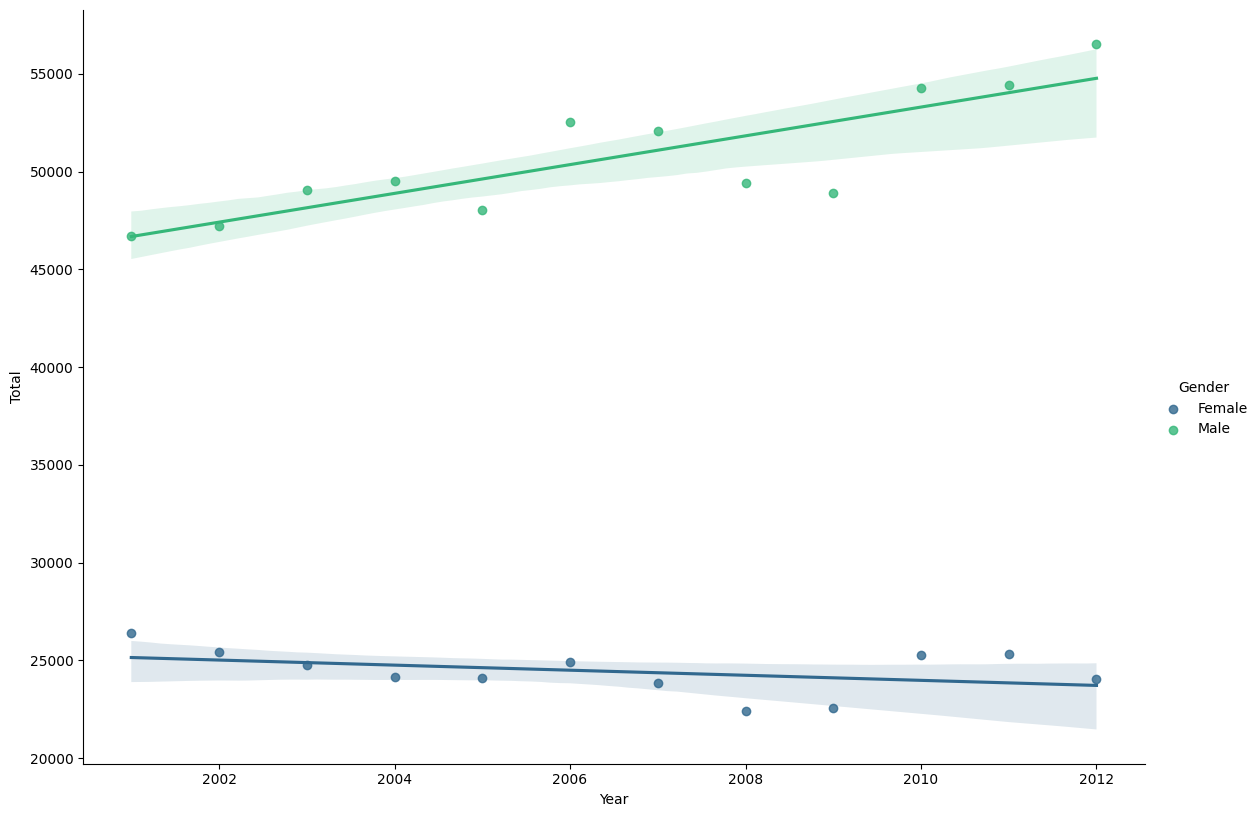

In [75]:
grouped_years = m.groupby(["Year","Gender"])["Total"].sum()
grouped_years = pd.DataFrame(grouped_years).reset_index()
# grouped_year
sns.lmplot(x="Year", y="Total",hue="Gender",  palette='viridis', data=grouped_years,height=8.27, aspect=11.7/8.27);

# Number of cases bases on the reason they committed suicide("Type_code")¶
Note: "Causes" means other causes according to me(it was not clearly mentioned in the dataset)

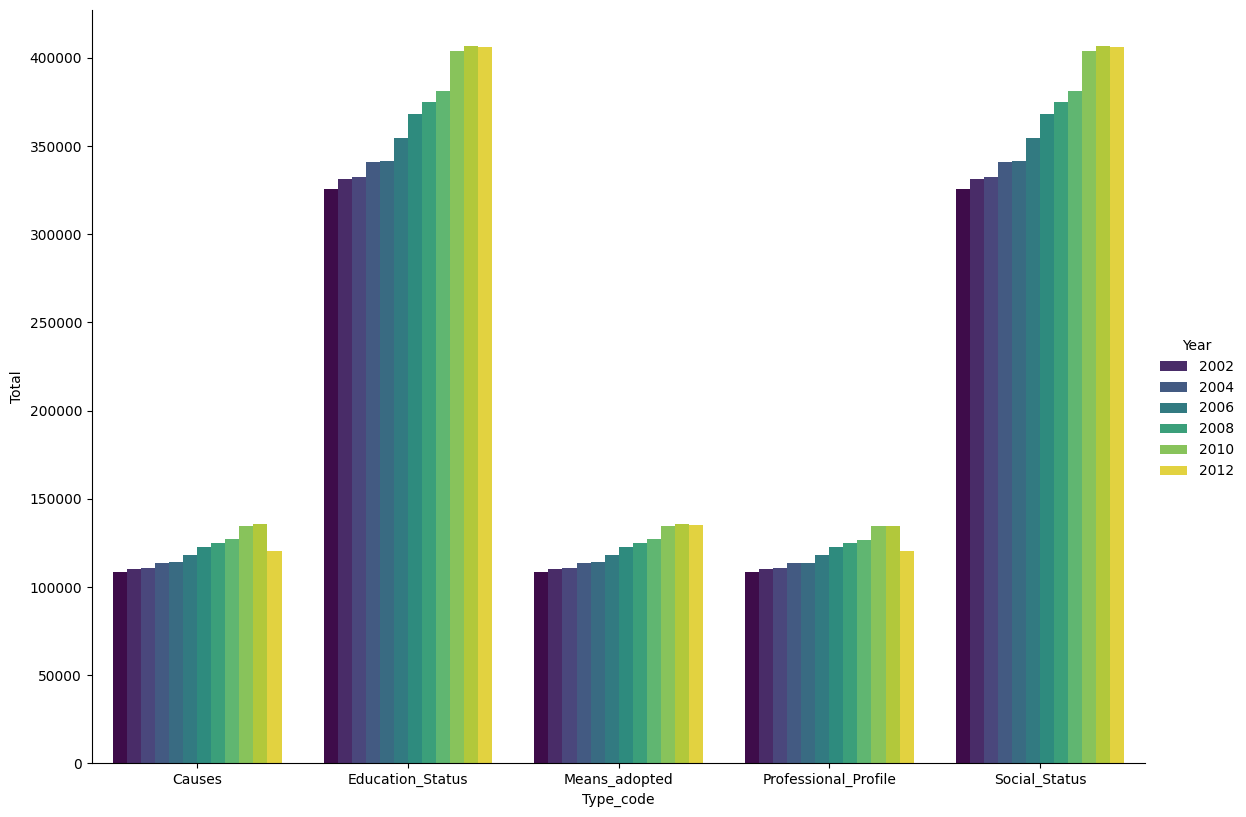

In [76]:
filter_type_codes = pd.DataFrame(m.groupby(["Type_code","Year"])["Total"].sum()).reset_index()
filter_type_codes
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", palette='viridis', data=filter_type_code,height=8.27, aspect=11.7/8.27);

# Which social issues causes more suicides?
It appears that married people count for the majority of suicide cases.

Which makes sense because marriage issues may cause conflict between the couple and as a result they might be prone to commit suicide.

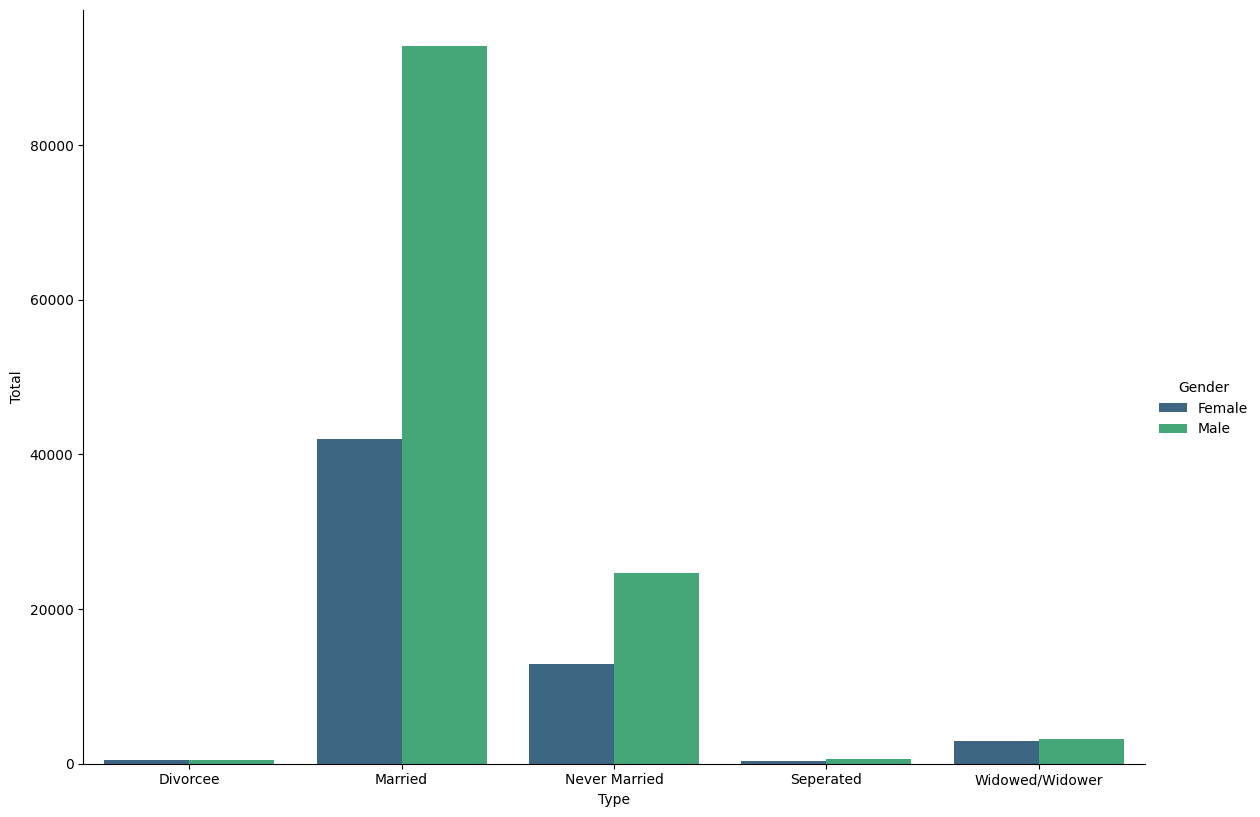

In [77]:
filters_social_status = pd.DataFrame(m[m["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
sns.catplot(x="Type", y="Total",hue="Gender",  palette='viridis', kind="bar", data=filters_social_status,height=8.27, aspect=11.7/8.27)

# What was the education status of people who committed suicides?
It appears that people with low education tend to commit more suicide.

People with Diploma and Graduate tend to commit least no. of suicide

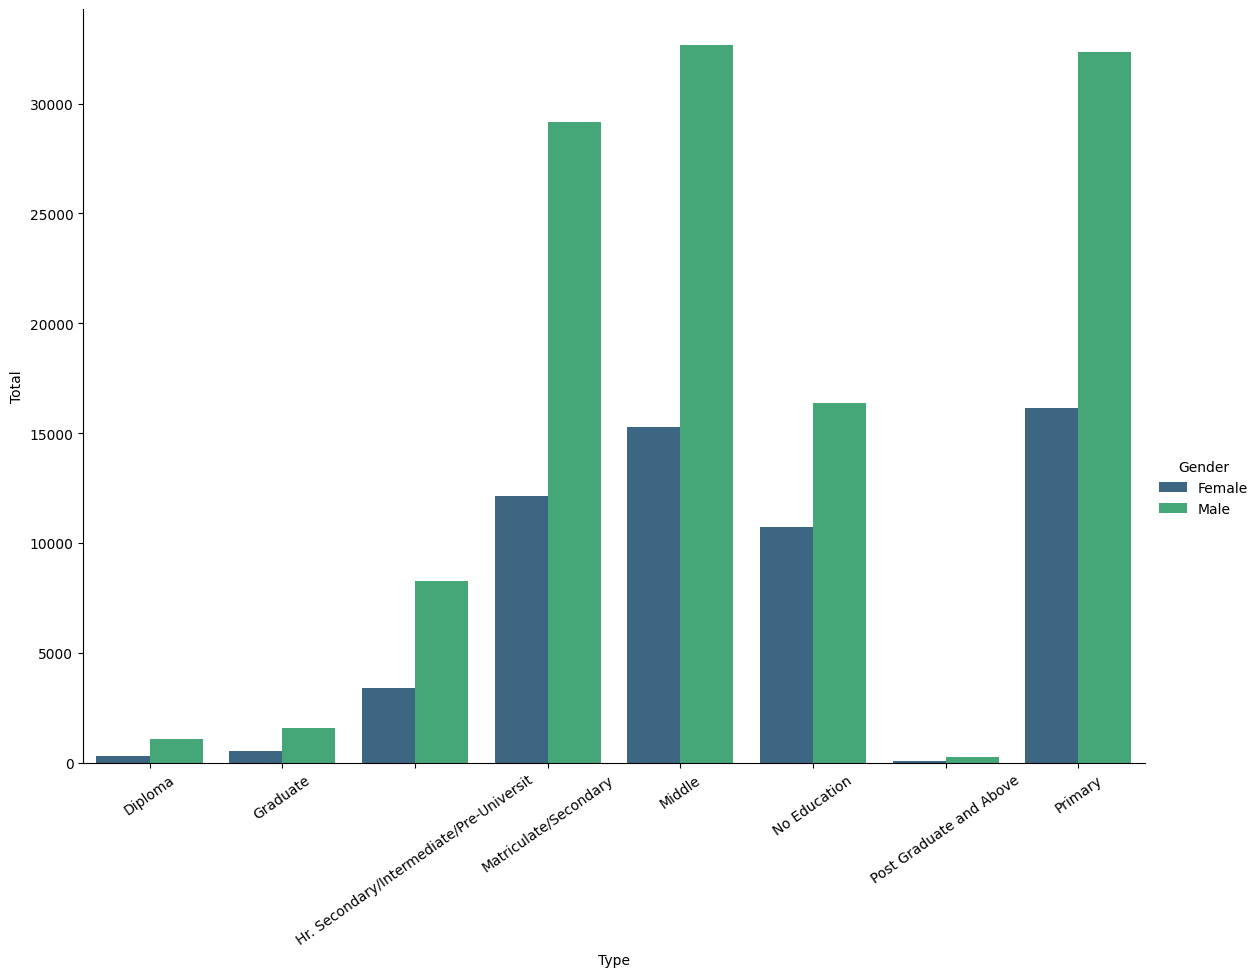

In [78]:
filters_social_status = pd.DataFrame(m[m["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", palette='viridis', data=filters_social_status,height=8.27, aspect=11.7/8.27)
g.set_xticklabels(rotation=35)

# What was the profession of the people who committed suicides?
Farmers and housewives tend to commit more suicide compared to others.

This makes sense because most of the Indian farmers have debt and their life depends on the yield of their crops, if the yield is not good then they will not be able to clear their debt and in the worst case they might commit suicide.

Global warming, monsoon delay, drought etc can lead to bad yield.

Housewives might have issues in their marriage which this might be a reason for such a high number of cases.

Domestic violence, dowry, gender discrimination, etc might be some of the reasons for housewives to commit suicide.

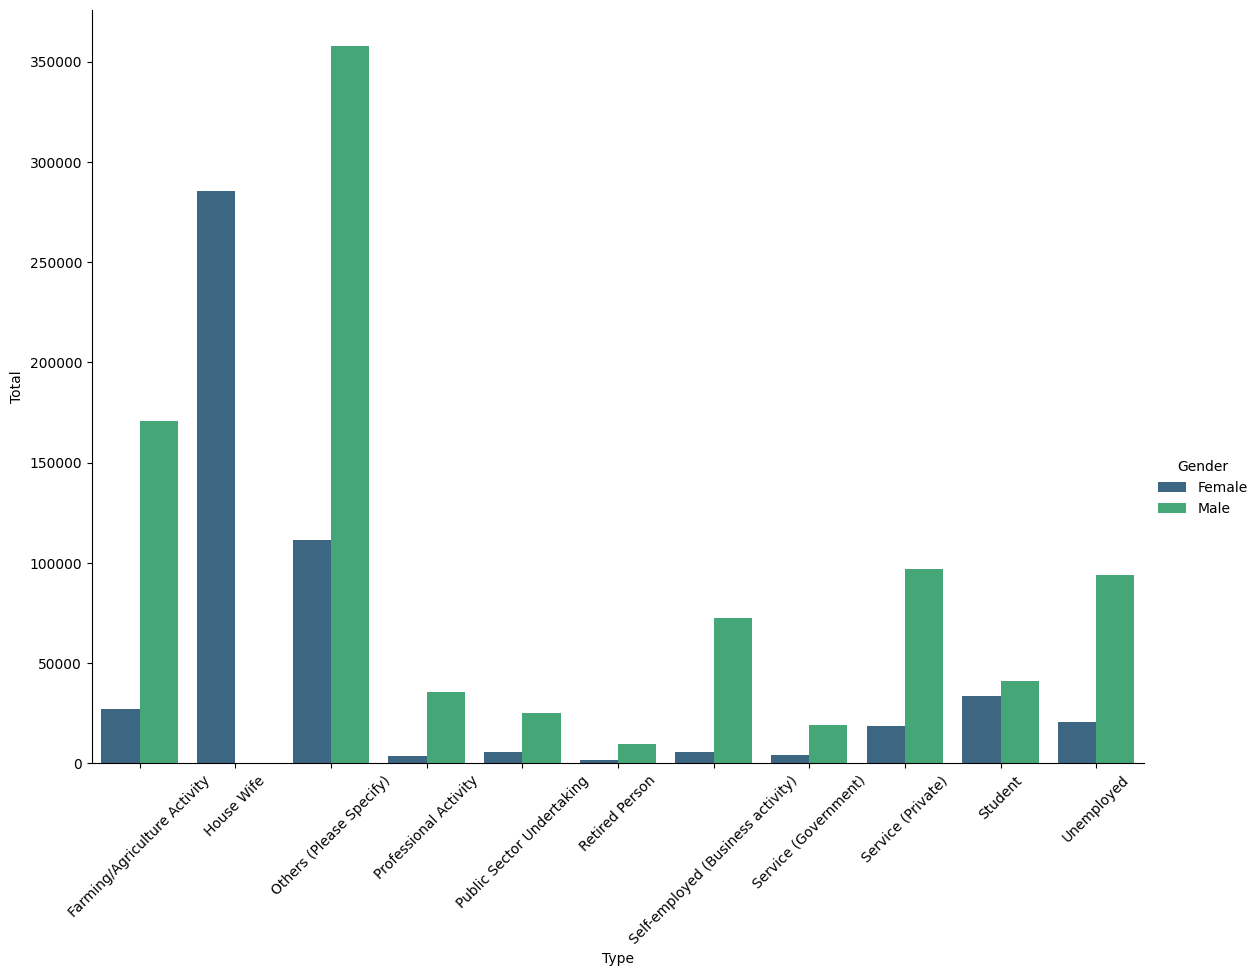

In [79]:
filters_social_status = pd.DataFrame(suicide[suicide["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", palette='viridis', kind="bar", data=filters_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=45)

# Which age group people tend to commit more suicide?
From the below visualization it is clear that youngsters (15-29 age) and middle age (30-44) tend to commit the maximum number of suicides.

It can be due to several reasons like:

unemployment
academic stress
bad friend circle
farmers (since they have to be young and strong enough to do farming)
addictions

# age group 0-100+ encapsulates all the remaining age groups, hence it would make sense to drop it
filter_age = suicide[suicide["Age_group"]!="0-100+"]
sns.catplot(x="Age_group", y="Total",hue="Age_group", kind="bar", data=filter_age, aspect=11.7/8.27);

In [80]:
# Here we are spliting the data into different age groups

g_age = m.groupby('Age_group')['Total'].sum()
df_age_types = pd.DataFrame(g_age).reset_index().sort_values('Age_group')
df_age_types = df_age_types.drop([0])
df_age_types

,Age_group,Total
1,0-14,5751
2,15-29,204870
3,30-44,186837
4,45-59,99486
5,60+,44223


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_17220\2993543639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_age_types['Age_group'], y = df_age_types['Total'], palette='viridis')


<Axes: xlabel='Age_group', ylabel='Total'>

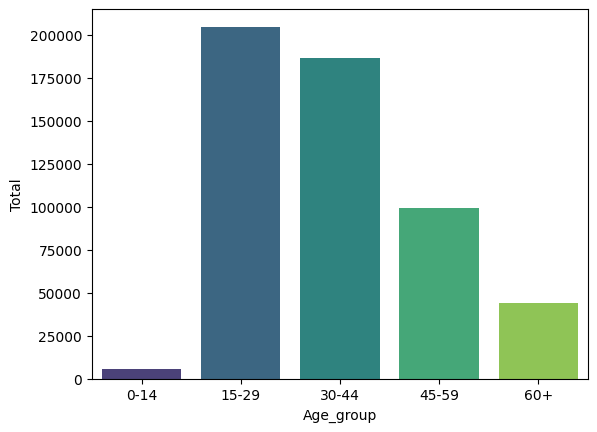

In [81]:
# Draw a bargraph categorising the people into different age groups

sns.barplot(x = df_age_types['Age_group'], y = df_age_types['Total'], palette='viridis')

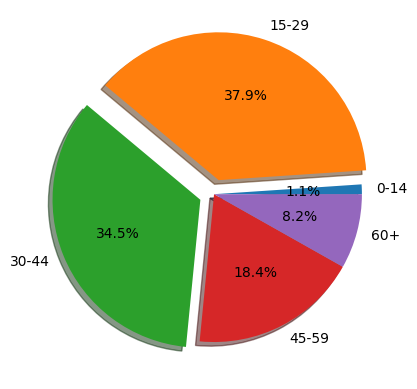

In [82]:
# Draw the same bargraph as a pie chart to see the percentage stats

labels = df_age_types['Age_group']
exp = (0,0.1,0.1,0,0)
plt.pie(df_age_types['Total'], labels=labels, autopct='%1.1f%%', explode = exp, shadow=True)
plt.show()

# Conclusion
Males tend to commit more suicides compared to Females in India

Highest no. of suicide cases occur in Maharashtra, West Bengal ,Andhra Pradesh and Tamil Nadu.

Male might commit more suicide compared to females in the future if this trend continues.

People who commit suicide are mostly:

Married

Farmers and housewives

Youngsters (15-29 age) and middle age (30-44)

In [83]:
indiaoverall = suicide[(suicide['Type_code'] == 'Education_Status') & (suicide['State'] == 'TOTAL (ALL INDIA)')]
indiaoverall.head()

,index,State,Year,Type_code,Type,Gender,Age_group,Total
179335,179335,TOTAL (ALL INDIA),2003,Education_Status,Post Graduate and Above,Male,0-100+,292
179337,179337,TOTAL (ALL INDIA),2007,Education_Status,No Education,Female,0-100+,11165
179341,179341,TOTAL (ALL INDIA),2008,Education_Status,No Education,Male,0-100+,15335
179342,179342,TOTAL (ALL INDIA),2009,Education_Status,Graduate,Male,0-100+,1938
179344,179344,TOTAL (ALL INDIA),2011,Education_Status,Graduate,Female,0-100+,1122


In [84]:
overall = indiaoverall.drop(columns=['index','State','Type_code','Type','Gender','Age_group'],axis=1)
overall = overall.groupby(['Year'],as_index=False).sum()
overall

,Year,Total
0,2001,108506
1,2002,110417
2,2003,110851
3,2004,113697
4,2005,113914
5,2006,118112
6,2007,122637
7,2008,125017
8,2009,127151
9,2010,134599


C:\Users\PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_17220\2163176967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total',data=overall,palette='viridis').set_title('Suicides in India Overall')


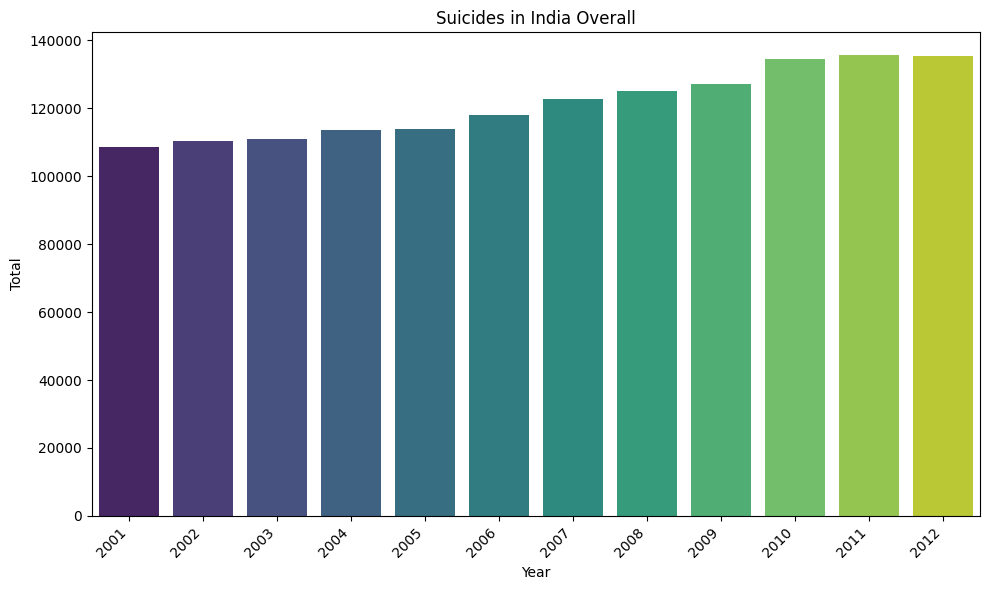

In [90]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year', y='Total',data=overall,palette='viridis').set_title('Suicides in India Overall')
plt.tight_layout()

# Conclusion

### suicides in India are a significant public health issue driven by factors like mental health struggles, socio-economic pressures, and lack of support systems. To reduce suicide rates, it is crucial to improve mental health awareness, enhance access to care, and address underlying social and economic challenges. A comprehensive approach involving government action, community support, and de-stigmatization of mental health can help prevent suicides and promote a healthier, more supportive society.